In [4]:
import os
from scipy import *
from scipy import signal
from pylab import *
from wave import *
import struct
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [156]:
x=np.linspace(-np.pi,30*np.pi,1000)
y=np.zeros(1000)
h=np.zeros(1000)

def superprogram(p, s, x, y, a=0, b=0, c=1, f=6, v=1):
    #x and y are arrays for coordinate points
    #f is period for which distortion effects happen
    #p is severity of effect
    #s selects effects takes integer values
    #v is a volume control input
    #h is output array
    #y is component
    #a, b, and c are weights for wave shape
    
    x=np.linspace(-np.pi,30*np.pi,1000)
    y=np.zeros(1000)
    h=np.zeros(1000)
    
    #Distortion1
    #typical p values = 10
    if s== 1:
        count = 0
        tick = 0
        for i in range(1000):
            if count==f:
                if tick == 0:
                    h[i]=(.02*p)+((a*signal.square((2*np.pi)/1000*i)) + b*signal.sawtooth((2*np.pi)/500*i-2*(np.pi)) + c*np.sin((2*np.pi)/1000*i))/(abs(a)+abs(b)+abs(c))
                    count-=f
                    tick+=1
                else:
                    h[i]=-(.02*p)+((a*signal.square((2*np.pi)/1000*i)) + b*signal.sawtooth((2*np.pi)/500*i-2*(np.pi)) + c*np.sin((2*np.pi)/1000*i))/(abs(a)+abs(b)+abs(c))
                    count-=f
                    tick-=1
            else:
                h[i]=((a*signal.square((2*np.pi)/1000*i)) + b*signal.sawtooth((2*np.pi)/500*i-2*(np.pi)) + c*np.sin((2*np.pi)/1000*i))/(abs(a)+abs(b)+abs(c))
            count += 1
        return h*v
    
    #chorus
    #typical p values = 6
    if s== 2:
        for i in range(1000): 
            y[i]=(a*signal.square(-np.pi+(f*np.pi)/1000*i*p) + b*signal.sawtooth(-np.pi+(f*np.pi)/500*i*p) + c*np.sin(-np.pi+(f*np.pi)/1000*i*p))/(abs(a)+abs(b)+abs(c)) 
        h[:]=y+(a*signal.square(-np.pi*x) + b*signal.sawtooth(-np.pi*x*.5+.5*np.pi) + c*np.sin(-np.pi*x))/(abs(a)+abs(b)+abs(c))
        return .5*h*v
    
    #tremolo
    #typical p values = 10
    if s== 3:
        for i in range(1000):
            y[i]=(a*signal.square(-np.pi+(31*np.pi)/1000*i) + b*signal.sawtooth(-2*np.pi+(31*np.pi)/500*i) + c*np.sin(-np.pi+(31*np.pi)/1000*i))/(abs(a)+abs(b)+abs(c)) 
            h[i]=np.sin(-np.pi+(x[i]*31*np.pi)/10*p*i)
        return h*y*v
    
    #fib distortion
    #typical p values = 10
    if s== 4:
        fib2=np.array([1,2,3,5,8,13,21,-1,-2,-3,-5,-8,-13,-21])
        count=0
        tick=0
        for i in range(1000):
            if tick==f:
                h[i]=(.005*p*fib2[count])+((a*signal.square((2*np.pi)/1000*i)) + b*signal.sawtooth((2*np.pi)/500*i-2*(np.pi)) + c*np.sin((2*np.pi)/1000*i))/(abs(a)+abs(b)+abs(c))
                count+=1
                tick-=f
                if count==14:
                    count=0
            else: 
                h[i]=((a*signal.square((2*np.pi)/1000*i)) + b*signal.sawtooth((2*np.pi)/500*i-2*(np.pi)) + c*np.sin((2*np.pi)/1000*i))/(abs(a)+abs(b)+abs(c))
                tick+=1
        return h*v
    
    #if invalid effect selection, returns only wave shapes
    else:
        for i in range(1000):
            h[i]=((a*signal.square((2*np.pi)/1000*i)) + b*signal.sawtooth((2*np.pi)/500*i-2*(np.pi)*i) + c*np.sin((2*np.pi)/1000*i))/(abs(a)+abs(b)+abs(c))
            
        return h*v

<IPython.core.display.Javascript object>


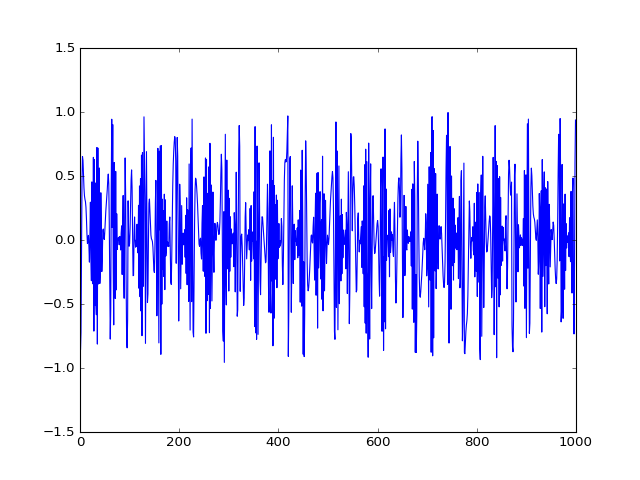

In [162]:
plt.ylim(-1.5,1.5)
#(p, s, x, y, a=0, b=0, c=1, f=6, v=1)
plt.plot(superprogram(10, 3, x, y, 0, 1, 0, 10, 1))
#plt.plot(superprogram(10,500,x,y,5,1,0,0,1))
#plt.plot(superprogram(10,500,x,y))

In [125]:
g=np.linspace(-np.pi,30*np.pi,1000)
q=np.zeros(1000)
w=np.zeros(1000)

def Trem(g,q,p):
    for i in range(1000): 
        y[i]=signal.square(-np.pi+(31*np.pi)/1000*i)
        h[i]=np.sin(-np.pi+(g[i]*31*np.pi)/10*p*i)
    return y*h

<IPython.core.display.Javascript object>


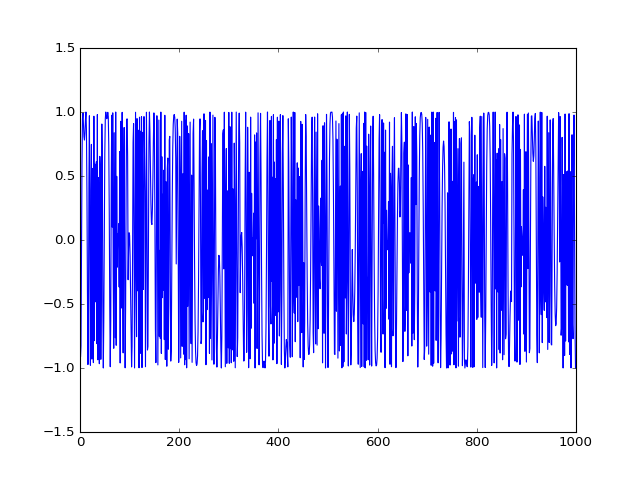

In [126]:
plt.ylim(-1.5,1.5)
plt.plot(Trem(g,q, 10))
#plt.plot(superprogram(10,500,x,y,0,0,1,1))